In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("../../preprocessing/data_preprocessed.csv")

In [3]:
df.head()

,a (AU),e,i (deg),w (deg),Node (deg),M (deg),q (AU),Q (AU),H (mag),MOID (AU),class
0,1.078066,0.826854,22.825495,31.382966,88.010681,215.528772,0.1867,1.97,16.90,0.034507,APO*
1,1.245304,0.335342,13.337482,276.893024,337.207958,104.155607,0.8277,1.66,15.60,0.030669,APO*
2,1.470264,0.559922,6.352995,285.852564,35.736768,174.626213,0.6470,2.29,16.25,0.025795,APO*
3,1.776025,0.650141,39.832538,267.791993,356.903343,173.188556,0.6214,2.93,15.20,0.003551,APO*
4,1.874123,0.764602,1.326399,43.388048,349.694944,235.158622,0.4412,3.31,18.80,0.011645,APO*


In [4]:
df.shape

(1747, 11)

In [5]:
feature_names = df.columns.to_list()[:-1]
X = df[feature_names]
X

,a (AU),e,i (deg),w (deg),Node (deg),M (deg),q (AU),Q (AU),H (mag),MOID (AU)
0,1.078066,0.826854,22.825495,31.382966,88.010681,215.528772,0.1867,1.97,16.90,0.034507
1,1.245304,0.335342,13.337482,276.893024,337.207958,104.155607,0.8277,1.66,15.60,0.030669
2,1.470264,0.559922,6.352995,285.852564,35.736768,174.626213,0.6470,2.29,16.25,0.025795
3,1.776025,0.650141,39.832538,267.791993,356.903343,173.188556,0.6214,2.93,15.20,0.003551
4,1.874123,0.764602,1.326399,43.388048,349.694944,235.158622,0.4412,3.31,18.80,0.011645
...,...,...,...,...,...,...,...,...,...,...
1742,1.662826,0.382487,0.874625,304.980506,221.156655,312.111572,1.0268,2.30,21.08,0.036365
1743,2.706630,0.764459,11.433742,282.994922,267.501145,344.253089,0.6375,4.78,20.19,0.016630
1744,2.037870,0.667525,8.906649,279.721935,64.690270,19.063147,0.6775,3.40,21.86,0.007084
1745,2.095193,0.654662,4.014503,145.429653,25.164523,340.766105,0.7235,3.47,21.91,0.044428


In [6]:
y = df['class']
y

0       APO*
1       APO*
2       APO*
3       APO*
4       APO*
        ... 
1742    AMO*
1743    APO*
1744    APO*
1745    APO*
1746    APO*
Name: class, Length: 1747, dtype: object

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [8]:
X_train.shape

(1222, 10)

In [9]:
X_test.shape

(525, 10)

In [10]:
y_train.shape

(1222,)

In [11]:
y_test.shape

(525,)

In [28]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_leaf' : [2,3]
}

In [29]:
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid = params, scoring = 'accuracy', cv = 4, verbose = 4)
#cv je broj foldova odnosno koliko puta se bira razlicit validacioni skup

In [30]:
estimator.fit(X_train, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV 1/4] END criterion=gini, max_depth=2, min_samples_leaf=2;, score=0.984 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=2, min_samples_leaf=2;, score=0.987 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=2, min_samples_leaf=2;, score=0.990 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=2, min_samples_leaf=2;, score=0.987 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=2, min_samples_leaf=3;, score=0.984 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=2, min_samples_leaf=3;, score=0.987 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=2, min_samples_leaf=3;, score=0.990 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=2, min_samples_leaf=3;, score=0.987 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=3, min_samples_leaf=2;, score=0.990 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=3, min_samples_leaf=2;, score=1.000 total time=   0.0s

[CV 3/4] END criterion=entropy, max_depth=7, min_samples_leaf=2;, score=1.000 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=7, min_samples_leaf=2;, score=1.000 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=7, min_samples_leaf=3;, score=0.993 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=7, min_samples_leaf=3;, score=1.000 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=7, min_samples_leaf=3;, score=1.000 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=7, min_samples_leaf=3;, score=1.000 total time=   0.0s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [2, 3]},
             scoring='accuracy', verbose=4)

In [31]:
estimator.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

In [32]:
estimator.best_score_

0.9983660130718954

In [33]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

In [34]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

model.fit(X_train, y_train)

In [35]:
model.classes_

array(['AMO*', 'APO', 'APO*', 'ATE', 'ATE*', 'IEO*'], dtype=object)

In [36]:
model.feature_importances_

array([0.52050221, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.34959337, 0.02364288, 0.10626154, 0.        ])

In [37]:
y_train_pred = model.predict(X_train)

In [38]:
confusion_matrix(y_train, y_train_pred)

array([[  67,    0,    0,    0,    0,    0],
       [   0,   10,    0,    0,    0,    0],
       [   0,    0, 1032,    0,    0,    0],
       [   0,    0,    0,    5,    0,    0],
       [   0,    0,    0,    0,  104,    0],
       [   0,    0,    0,    0,    0,    4]])

In [39]:
y_test_pred = model.predict(X_test)

In [40]:
confusion_matrix(y_test, y_test_pred)

array([[ 29,   0,   0,   0,   0,   0],
       [  0,   4,   0,   0,   0,   0],
       [  1,   0, 443,   0,   0,   0],
       [  0,   0,   0,   2,   0,   0],
       [  0,   0,   1,   0,  44,   0],
       [  0,   0,   0,   0,   0,   1]])

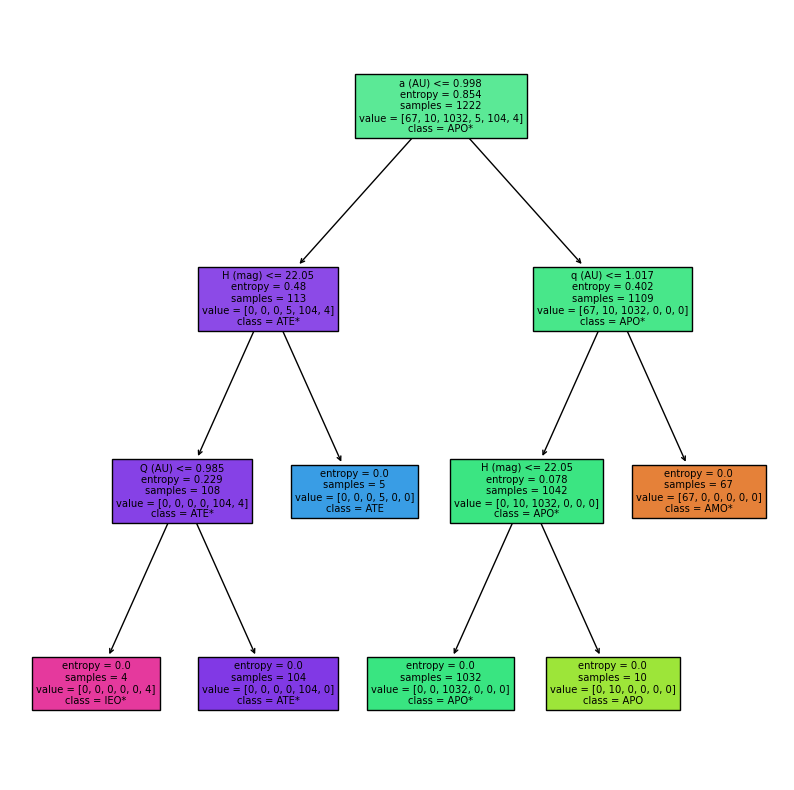

In [41]:
plt.figure(figsize = (10, 10))
_ = plot_tree(model, feature_names=feature_names, class_names = model.classes_, filled = True)